In [1]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
PATH = 'C:/Users/Diyahir/Documents/ELEC 475/Term Project'
PATH = '/home/ayush/Documents/'

## Extracting Histogram

In [3]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/'+g).mkdir(parents=True, exist_ok=True)   
    print(g)

    for filename in os.listdir(PATH +'/genres/'+g):
        songname = PATH + '/genres/'+g +'/'+ filename
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/'+g+'/'+ filename[:-3].replace(".", ""))
        plt.clf()
        


blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


<Figure size 720x720 with 0 Axes>

In [4]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [5]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    print(g)
    for filename in os.listdir(PATH +'/genres/'+g):
        songname = PATH + '/genres/'+g +'/'+ filename
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rmse(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


In [6]:
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00066.au,0.374710,0.110496,2340.432873,2256.538115,4972.503265,0.121775,-116.517402,97.430279,-13.880191,...,10.998190,-13.861801,9.735367,-5.089488,2.634638,-9.883816,6.159059,-7.682608,-4.852479,blues
1,blues.00037.au,0.248627,0.069145,1188.168337,1682.860150,2339.635853,0.048160,-328.673793,102.696873,19.876064,...,-8.897177,-9.238519,-9.109326,-9.003836,-7.640767,-7.190916,-9.368477,-4.470060,-3.688800,blues
2,blues.00013.au,0.264616,0.113221,1324.304356,1827.737535,2710.033613,0.051417,-209.789266,124.458449,10.310380,...,-2.205935,-3.038192,8.645516,-0.304230,-0.637744,-2.939885,-1.705923,-1.769590,-7.762958,blues
3,blues.00011.au,0.367137,0.065713,1353.260462,1757.230941,2882.224238,0.043959,-287.914965,123.980064,5.459754,...,-3.180866,-5.556420,-6.789627,-2.644640,-2.984927,-3.385201,-1.856390,1.836151,-4.897420,blues
4,blues.00029.au,0.280456,0.124715,1649.293771,2190.248306,3761.427255,0.052926,-233.724591,101.183595,17.650272,...,-6.046127,-5.065351,1.073173,-5.780492,-8.305596,-11.386346,-6.725316,-10.027707,-14.035269,blues


In [7]:
# Drop unnecessary columns
data = data.drop(['filename'],axis=1)

In [8]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [11]:
finalDf = pd.concat([principalDf, data[['label']]], axis = 1)


In [12]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,label
0,3.965104,-0.884181,0.806179,blues
1,-2.333819,-4.033521,2.775286,blues
2,-1.058976,-2.630672,-0.536523,blues
3,-2.427959,-2.481258,-0.119241,blues
4,-0.218579,-3.418398,4.217736,blues


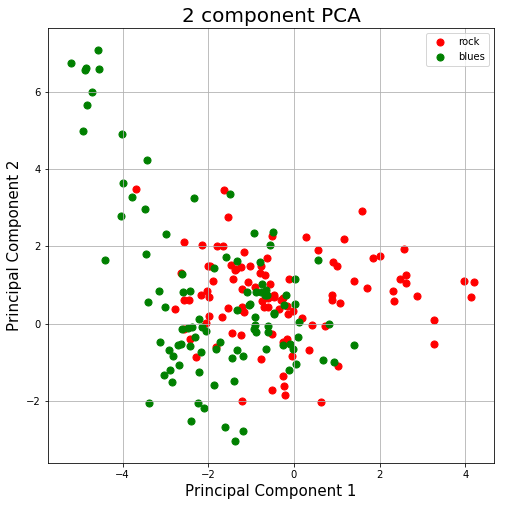

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['rock', 'blues'] #, 'country', 'disco', 'hiphop', 'jazz']
colors = ['r', 'g']#,'b','y','c','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [14]:
vals = finalDf.values[:,0:2]

In [15]:
vals.shape

(1000, 2)

<function matplotlib.pyplot.show(*args, **kw)>

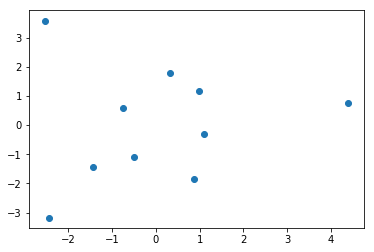

In [16]:
centers = []
for i in range(10):
    current = vals[100*i:100*(i+1),:]
    currmean = np.average(current, axis = 0)
    centers.append(currmean)
    
centers = np.array(centers)
plt.scatter(centers[:,0],centers[:,1])
plt.show

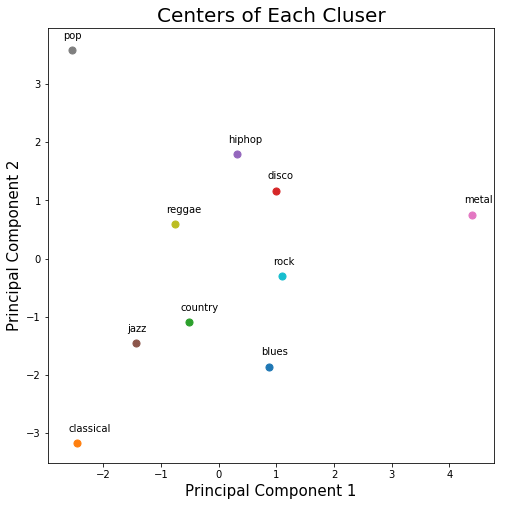

In [17]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
targets = genres
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('Centers of Each Cluser', fontsize = 20)
j = 0
for target in genres:
    
    ax.scatter(centers[j,0],centers[j,1]
               , s = 50)
    ax.text(centers[j,0]-0.15,centers[j,1]+0.2,genres[j])

    j += 1
    


## Classification

The first model will be generated through Keras/sklearn. The second will be created using sklearn's Linear SVM module.

In [18]:
# Data now has filename removed (5x27).
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.374710,0.110496,2340.432873,2256.538115,4972.503265,0.121775,-116.517402,97.430279,-13.880191,48.966759,...,10.998190,-13.861801,9.735367,-5.089488,2.634638,-9.883816,6.159059,-7.682608,-4.852479,blues
1,0.248627,0.069145,1188.168337,1682.860150,2339.635853,0.048160,-328.673793,102.696873,19.876064,26.731257,...,-8.897177,-9.238519,-9.109326,-9.003836,-7.640767,-7.190916,-9.368477,-4.470060,-3.688800,blues
2,0.264616,0.113221,1324.304356,1827.737535,2710.033613,0.051417,-209.789266,124.458449,10.310380,47.018006,...,-2.205935,-3.038192,8.645516,-0.304230,-0.637744,-2.939885,-1.705923,-1.769590,-7.762958,blues
3,0.367137,0.065713,1353.260462,1757.230941,2882.224238,0.043959,-287.914965,123.980064,5.459754,33.678089,...,-3.180866,-5.556420,-6.789627,-2.644640,-2.984927,-3.385201,-1.856390,1.836151,-4.897420,blues
4,0.280456,0.124715,1649.293771,2190.248306,3761.427255,0.052926,-233.724591,101.183595,17.650272,23.734355,...,-6.046127,-5.065351,1.073173,-5.780492,-8.305596,-11.386346,-6.725316,-10.027707,-14.035269,blues


## Splitting data into train and test sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
len(y_train)

800

In [23]:
len(y_test)

200

As we can see, the given data has been partitioned into train and test sets. Now, let's specify and fit our neural network model.

## Model Generation

In [84]:
from keras import models
from keras import layers

# This section of code generates the baseline model without any
# special accuracy tweaks to it. Tweaks are mentioned below.
# Using sequential model (a linear stack of layers in a neural net)
model = models.Sequential()

# Specify and add layers to the model.
model.add(layers.Dense(256, activation='relu', 
                       input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Add final softmax layer to map output of network to a probability distribution.
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Adjust epochs to train the model more.
baseline_history = model.fit(X_train, y_train, epochs=100,
                    batch_size=128)

Epoch 1/100
800/800 [==============================] - 1s 954us/step - loss: 2.1500 - acc: 0.2275
Epoch 2/100
800/800 [==============================] - 0s 43us/step - loss: 1.8530 - acc: 0.3750
Epoch 3/100
800/800 [==============================] - 0s 44us/step - loss: 1.6527 - acc: 0.4138
Epoch 4/100
800/800 [==============================] - 0s 40us/step - loss: 1.4829 - acc: 0.4825
Epoch 5/100
800/800 [==============================] - 0s 40us/step - loss: 1.3494 - acc: 0.5487
Epoch 6/100
800/800 [==============================] - 0s 45us/step - loss: 1.2355 - acc: 0.5700
Epoch 7/100
800/800 [==============================] - 0s 32us/step - loss: 1.1435 - acc: 0.6175
Epoch 8/100
800/800 [==============================] - 0s 33us/step - loss: 1.0696 - acc: 0.6512
Epoch 9/100
800/800 [==============================] - 0s 26us/step - loss: 1.0002 - acc: 0.6887
Epoch 10/100
800/800 [==============================] - 0s 38us/step - loss: 0.9511 - acc: 0.7037
Epoch 11/100
800/800 [======

800/800 [==============================] - 0s 23us/step - loss: 0.0278 - acc: 0.9975
Epoch 85/100
800/800 [==============================] - 0s 24us/step - loss: 0.0256 - acc: 0.9975
Epoch 86/100
800/800 [==============================] - 0s 24us/step - loss: 0.0245 - acc: 0.9975
Epoch 87/100
800/800 [==============================] - 0s 23us/step - loss: 0.0245 - acc: 0.9988
Epoch 88/100
800/800 [==============================] - 0s 24us/step - loss: 0.0231 - acc: 0.9988
Epoch 89/100
800/800 [==============================] - 0s 25us/step - loss: 0.0216 - acc: 0.9988
Epoch 90/100
800/800 [==============================] - 0s 22us/step - loss: 0.0214 - acc: 0.9988
Epoch 91/100
800/800 [==============================] - 0s 22us/step - loss: 0.0224 - acc: 0.9975
Epoch 92/100
800/800 [==============================] - 0s 24us/step - loss: 0.0230 - acc: 0.9988
Epoch 93/100
800/800 [==============================] - 0s 24us/step - loss: 0.0211 - acc: 0.9988
Epoch 94/100
800/800 [===========

In [85]:
# Evaluate accuracy and loss
test_loss, test_acc = model.evaluate(X_test, y_test)

200/200 [==============================] - 0s 1ms/step


In [86]:
print('test accuracy: ', test_acc)

test accuracy:  0.695


We can see that there is some overfitting going on due to a large amount of data with a low accuracy.

## Tweaking Models and Comparing Performance

As a result of overfitting, we will need to tweak the number and density of our neural network layers. Hopefully, with a smaller network, we will be able to prevent the overfitting that takes place immediately. A common method of preventing overfitting is 'Dropout.' It is a prevalent regularization technique for neural networks.  Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.

In [143]:
# Model with dropout
dpt_model = models.Sequential()

# Specify and add layers to the model.
# We will be adding two Dropout layers to the model.
dpt_model.add(layers.Dense(256, activation='relu', 
                       input_shape=(X_train.shape[1],)))
dpt_model.add(layers.Dense(128, activation='relu'))
dpt_model.add(layers.Dropout(0.5))  # Dropout layer 2
dpt_model.add(layers.Dense(64, activation='relu'))

# Add final softmax layer to map output of network to a probability distribution.
# The size of the softmax layer must be 10 because we have 10
# different genres.
dpt_model.add(layers.Dense(10, activation='softmax'))

dpt_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

dpt_history = dpt_model.fit(X_train, y_train, epochs=100,
                    batch_size=128)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 2.2743 - acc: 0.1638
Epoch 2/100
800/800 [==============================] - 0s 35us/step - loss: 2.0461 - acc: 0.3300
Epoch 3/100
800/800 [==============================] - 0s 36us/step - loss: 1.9048 - acc: 0.3712
Epoch 4/100
800/800 [==============================] - 0s 39us/step - loss: 1.7506 - acc: 0.4000
Epoch 5/100
800/800 [==============================] - 0s 41us/step - loss: 1.6237 - acc: 0.4362
Epoch 6/100
800/800 [==============================] - 0s 45us/step - loss: 1.5377 - acc: 0.4563
Epoch 7/100
800/800 [==============================] - 0s 35us/step - loss: 1.4535 - acc: 0.4788
Epoch 8/100
800/800 [==============================] - 0s 40us/step - loss: 1.3588 - acc: 0.5062
Epoch 9/100
800/800 [==============================] - 0s 41us/step - loss: 1.2855 - acc: 0.5400
Epoch 10/100
800/800 [==============================] - 0s 35us/step - loss: 1.2567 - acc: 0.5413
Epoch 11/100
800/800 [========

800/800 [==============================] - 0s 37us/step - loss: 0.2437 - acc: 0.9288
Epoch 85/100
800/800 [==============================] - 0s 31us/step - loss: 0.2251 - acc: 0.9325
Epoch 86/100
800/800 [==============================] - 0s 33us/step - loss: 0.2254 - acc: 0.9438
Epoch 87/100
800/800 [==============================] - 0s 30us/step - loss: 0.2211 - acc: 0.9325
Epoch 88/100
800/800 [==============================] - 0s 28us/step - loss: 0.2159 - acc: 0.9300
Epoch 89/100
800/800 [==============================] - 0s 30us/step - loss: 0.2029 - acc: 0.9413
Epoch 90/100
800/800 [==============================] - 0s 30us/step - loss: 0.2358 - acc: 0.9125
Epoch 91/100
800/800 [==============================] - 0s 34us/step - loss: 0.1937 - acc: 0.9475
Epoch 92/100
800/800 [==============================] - 0s 38us/step - loss: 0.2183 - acc: 0.9300
Epoch 93/100
800/800 [==============================] - 0s 32us/step - loss: 0.1944 - acc: 0.9337
Epoch 94/100
800/800 [===========

In [144]:
# Evaluate accuracy and loss with dropout
dpt_test_loss, dpt_test_acc = dpt_model.evaluate(X_test, y_test)

200/200 [==============================] - 1s 4ms/step


In [145]:
print(dpt_test_acc)

0.695


The dropout test accuracy indicates that dropout doesn't seem to be impacting the model that much. For this run, the epoch size was increased to 100. Let's try to improve performance with larger layers (and Dropout).

In [196]:
# Model with dropout and larger layers
lldpt_model = models.Sequential()

# Specify and add layers to the model.
# We will be adding three Dropout layers to the model.
# Essentially, 25% of the dense layers will be dropped out after each
# add. 
lldpt_model.add(layers.Dense(1024, activation='relu', 
                       input_shape=(X_train.shape[1],)))
lldpt_model.add(layers.Dropout(0.5))  # Dropout layer 1
lldpt_model.add(layers.Dense(512, activation='relu'))
lldpt_model.add(layers.Dropout(0.5))  # Dropout layer 2
lldpt_model.add(layers.Dense(128, activation='relu'))

# Add final softmax layer to map output of network to a probability distribution.
# The size of the softmax layer must be 10 because we have 10
# different genres.
lldpt_model.add(layers.Dense(10, activation='softmax'))

lldpt_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

lldpt_history = lldpt_model.fit(X_train, y_train, epochs=100,
                    batch_size=128)

Epoch 1/100
800/800 [==============================] - 3s 4ms/step - loss: 2.1140 - acc: 0.2512
Epoch 2/100
800/800 [==============================] - 0s 162us/step - loss: 1.7086 - acc: 0.3675
Epoch 3/100
800/800 [==============================] - 0s 145us/step - loss: 1.4994 - acc: 0.4575
Epoch 4/100
800/800 [==============================] - 0s 149us/step - loss: 1.3419 - acc: 0.5000
Epoch 5/100
800/800 [==============================] - 0s 148us/step - loss: 1.2814 - acc: 0.5375
Epoch 6/100
800/800 [==============================] - 0s 145us/step - loss: 1.1769 - acc: 0.5800
Epoch 7/100
800/800 [==============================] - 0s 147us/step - loss: 1.1157 - acc: 0.6038
Epoch 8/100
800/800 [==============================] - 0s 144us/step - loss: 1.0771 - acc: 0.6175
Epoch 9/100
800/800 [==============================] - 0s 148us/step - loss: 1.0249 - acc: 0.6288
Epoch 10/100
800/800 [==============================] - 0s 155us/step - loss: 0.9439 - acc: 0.6775
Epoch 11/100
800/800 

800/800 [==============================] - 0s 166us/step - loss: 0.1741 - acc: 0.9425
Epoch 84/100
800/800 [==============================] - 0s 139us/step - loss: 0.1550 - acc: 0.9487
Epoch 85/100
800/800 [==============================] - 0s 147us/step - loss: 0.1536 - acc: 0.9462
Epoch 86/100
800/800 [==============================] - 0s 174us/step - loss: 0.1391 - acc: 0.9537
Epoch 87/100
800/800 [==============================] - 0s 165us/step - loss: 0.1535 - acc: 0.9475
Epoch 88/100
800/800 [==============================] - 0s 157us/step - loss: 0.1641 - acc: 0.9425
Epoch 89/100
800/800 [==============================] - 0s 143us/step - loss: 0.1480 - acc: 0.9537
Epoch 90/100
800/800 [==============================] - 0s 154us/step - loss: 0.1679 - acc: 0.9462
Epoch 91/100
800/800 [==============================] - 0s 170us/step - loss: 0.1411 - acc: 0.9563
Epoch 92/100
800/800 [==============================] - 0s 164us/step - loss: 0.1494 - acc: 0.9537
Epoch 93/100
800/800 [=

In [197]:
# Evaluate accuracy and loss with dropout
lldpt_test_loss, lldpt_test_acc = lldpt_model.evaluate(X_test, y_test)

200/200 [==============================] - 1s 6ms/step


In [198]:
print(lldpt_test_acc)

0.725


Evidently, by increasing the layer densities, increasing the number of epochs, and introducing two evenly-spaced Dropout layers, we are getting slightly better performance with our neural network because there is less overfitting going on. 

## Adding Weight Regularization

Weight regularization is another technique that can help us improve our model's performance. We can add L2 weight regularization to our 'lldpt_model', which stands for Larger Layer Dropout Model.

In [202]:
# Add L2 weight regularization to 'lldpt_model'
# Model with dropout and larger layers
lldpt_model = models.Sequential()

# Specify and add layers to the model.
# We will be regularizing each dense layer.
lldpt_model.add(layers.Dense(1024, 
                             kernel_regularizer=keras.regularizers.l2(0.001),
                             activation='relu',  
                             input_shape=(X_train.shape[1],)))
lldpt_model.add(layers.Dropout(0.5))  # Dropout layer 1
lldpt_model.add(layers.Dense(512, 
                             kernel_regularizer=keras.regularizers.l2(0.001),
                             activation='relu'))
lldpt_model.add(layers.Dropout(0.5))  # Dropout layer 2
lldpt_model.add(layers.Dense(128, 
                             kernel_regularizer=keras.regularizers.l2(0.001),
                             activation='relu'))

# Add final softmax layer to map output of network to a probability distribution.
# The size of the softmax layer must be 10 because we have 10
# different genres.
lldpt_model.add(layers.Dense(10, activation='softmax'))

lldpt_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

l2_model_history = lldpt_model.fit(X_train, y_train, epochs=100,
                    batch_size=128)

Epoch 1/100
800/800 [==============================] - 3s 4ms/step - loss: 3.0446 - acc: 0.2425
Epoch 2/100
800/800 [==============================] - 0s 156us/step - loss: 2.6341 - acc: 0.3637
Epoch 3/100
800/800 [==============================] - 0s 166us/step - loss: 2.4074 - acc: 0.4500
Epoch 4/100
800/800 [==============================] - 0s 156us/step - loss: 2.2283 - acc: 0.5087
Epoch 5/100
800/800 [==============================] - 0s 153us/step - loss: 2.1197 - acc: 0.5437
Epoch 6/100
800/800 [==============================] - 0s 186us/step - loss: 2.0166 - acc: 0.6013
Epoch 7/100
800/800 [==============================] - 0s 186us/step - loss: 1.9378 - acc: 0.6112
Epoch 8/100
800/800 [==============================] - 0s 177us/step - loss: 1.8508 - acc: 0.6438
Epoch 9/100
800/800 [==============================] - 0s 179us/step - loss: 1.7928 - acc: 0.6663
Epoch 10/100
800/800 [==============================] - 0s 154us/step - loss: 1.7598 - acc: 0.6737
Epoch 11/100
800/800 

800/800 [==============================] - 0s 168us/step - loss: 0.6370 - acc: 0.9337
Epoch 84/100
800/800 [==============================] - 0s 165us/step - loss: 0.6797 - acc: 0.9300
Epoch 85/100
800/800 [==============================] - 0s 179us/step - loss: 0.6494 - acc: 0.9363
Epoch 86/100
800/800 [==============================] - 0s 171us/step - loss: 0.6415 - acc: 0.9363
Epoch 87/100
800/800 [==============================] - 0s 171us/step - loss: 0.6439 - acc: 0.9363
Epoch 88/100
800/800 [==============================] - 0s 175us/step - loss: 0.6424 - acc: 0.9425
Epoch 89/100
800/800 [==============================] - 0s 154us/step - loss: 0.6117 - acc: 0.9537
Epoch 90/100
800/800 [==============================] - 0s 172us/step - loss: 0.6263 - acc: 0.9387
Epoch 91/100
800/800 [==============================] - 0s 183us/step - loss: 0.5975 - acc: 0.9575
Epoch 92/100
800/800 [==============================] - 0s 182us/step - loss: 0.6064 - acc: 0.9450
Epoch 93/100
800/800 [=

In [203]:
# Evaluate accuracy and loss with dropout
l2_test_loss, l2_test_acc = lldpt_model.evaluate(X_test, y_test)

200/200 [==============================] - 1s 6ms/step


In [204]:
print(l2_test_acc)

0.735


With both weight regularization and dropout, the performance of the model has been significantly improved. We can now compare the performance of our baseline model, dropout model, and larger layer dropout model with weight regularization ('lldpt_model') using a section of our training data as a validation set.

## Comparing Model Performance

In [223]:
# Set aside a section of our training data as a validation set.
# Let us set aside 200 samples in the training data.
partial_x_train = X_train[200:]
partial_y_train = y_train[200:]

# Take subsets of X and y for validation data.
x_val = X_train[:200]
y_val = y_train[:200]

### Baseline Model

In [250]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Train on 600 samples, validate on 200 samples
Epoch 1/30
600/600 [==============================] - 0s 38us/step - loss: 0.0027 - acc: 0.9983 - val_loss: 0.2150 - val_acc: 0.9200
Epoch 2/30
600/600 [==============================] - 0s 31us/step - loss: 0.0027 - acc: 0.9983 - val_loss: 0.2169 - val_acc: 0.9200
Epoch 3/30
600/600 [==============================] - 0s 32us/step - loss: 0.0030 - acc: 0.9983 - val_loss: 0.2183 - val_acc: 0.9200
Epoch 4/30
600/600 [==============================] - 0s 46us/step - loss: 0.0033 - acc: 0.9983 - val_loss: 0.2186 - val_acc: 0.9150
Epoch 5/30
600/600 [==============================] - 0s 32us/step - loss: 0.0035 - acc: 0.9983 - val_loss: 0.2178 - val_acc: 0.9200
Epoch 6/30
600/600 [==============================] - 0s 34us/step - loss: 0.0033 - acc: 0.9983 - val_loss: 0.2163 - val_acc: 0.9200
Epoch 7/30
600/600 [==============================] - 0s 37us/step - loss: 0.0032 - acc: 0.9983 - val_loss: 0.2155 - val_acc: 0.9200
Epoch 8/30
600/600 [===

In [251]:
print(results)

[1.9908018970489503, 0.685]


### Dropout Model

In [252]:
dpt_model.fit(partial_x_train,
              partial_y_train,
              epochs=30,
              batch_size=512,
              validation_data=(x_val, y_val))
results = dpt_model.evaluate(X_test, y_test)

Train on 600 samples, validate on 200 samples
Epoch 1/30
600/600 [==============================] - 0s 25us/step - loss: 0.0035 - acc: 0.9983 - val_loss: 0.9593 - val_acc: 0.8350
Epoch 2/30
600/600 [==============================] - 0s 44us/step - loss: 0.0067 - acc: 0.9983 - val_loss: 0.9564 - val_acc: 0.8350
Epoch 3/30
600/600 [==============================] - 0s 25us/step - loss: 0.0040 - acc: 0.9983 - val_loss: 0.9514 - val_acc: 0.8350
Epoch 4/30
600/600 [==============================] - 0s 41us/step - loss: 0.0052 - acc: 0.9983 - val_loss: 0.9457 - val_acc: 0.8350
Epoch 5/30
600/600 [==============================] - 0s 44us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.9416 - val_acc: 0.8300
Epoch 6/30
600/600 [==============================] - 0s 34us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.9399 - val_acc: 0.8300
Epoch 7/30
600/600 [==============================] - 0s 32us/step - loss: 0.0044 - acc: 0.9967 - val_loss: 0.9403 - val_acc: 0.8300
Epoch 8/30
600/600 [===

In [253]:
print(results)

[2.3179748916625975, 0.72]


### Large-layer Dropout Model with Weight Regularization

In [254]:
lldpt_model.fit(partial_x_train,
              partial_y_train,
              epochs=30,
              batch_size=512)
results = lldpt_model.evaluate(X_test, y_test)

Epoch 1/30
600/600 [==============================] - 0s 118us/step - loss: 0.2009 - acc: 0.9967
Epoch 2/30
600/600 [==============================] - 0s 119us/step - loss: 0.2000 - acc: 0.9917
Epoch 3/30
600/600 [==============================] - 0s 117us/step - loss: 0.1967 - acc: 0.9967
Epoch 4/30
600/600 [==============================] - 0s 111us/step - loss: 0.2005 - acc: 0.9933
Epoch 5/30
600/600 [==============================] - 0s 109us/step - loss: 0.1976 - acc: 0.9950
Epoch 6/30
600/600 [==============================] - 0s 125us/step - loss: 0.1982 - acc: 0.9967
Epoch 7/30
600/600 [==============================] - 0s 125us/step - loss: 0.1890 - acc: 0.9983
Epoch 8/30
600/600 [==============================] - 0s 117us/step - loss: 0.1944 - acc: 0.9983
Epoch 9/30
600/600 [==============================] - 0s 129us/step - loss: 0.1983 - acc: 0.9950
Epoch 10/30
600/600 [==============================] - 0s 112us/step - loss: 0.1884 - acc: 0.9967
Epoch 11/30
600/600 [========

In [255]:
print(results)

[1.2799248695373535, 0.72]


Overall, we gain about a 4-5% increase over the baseline in accuracy when we use just the dropout model with weight regularization. In this regard, both the normal dropout model and the weight regularized dropout model are performing evenly. However, there is less loss on the latter model.

## Predictions on Test Data

In [290]:
predictions = lldpt_model.predict(X_test)

In [288]:
print(predictions.shape)

(200, 10)


Since the predictions are outputted in the matrix 'predictions' (confidence % of each file in the test set belonging to a particular genre), we can use sklearn's built in 'confusion_matrix' module to compute the confusion matrix.

In [296]:
from sklearn.metrics import confusion_matrix

print(predictions.shape)
print(predictions)
print(sum(predictions[0]))

(200, 10)
[[9.5873660e-01 6.3018142e-03 9.1594448e-03 ... 1.5977096e-07
  1.1990317e-03 1.0038598e-05]
 [2.5732745e-04 2.0853665e-03 6.6218007e-01 ... 1.7474435e-01
  6.7878790e-02 8.7351143e-02]
 [1.1232414e-05 1.9077029e-03 5.1230136e-06 ... 2.0254612e-02
  4.6231866e-01 1.1105110e-05]
 ...
 [1.1430260e-05 1.2110319e-03 2.1867430e-01 ... 7.6864654e-01
  1.3073945e-03 1.1983878e-04]
 [1.3243633e-04 1.7981356e-04 4.8068459e-03 ... 8.5697873e-03
  8.4399953e-02 2.3619948e-02]
 [2.3274569e-04 1.1368395e-03 5.9028868e-02 ... 1.2718169e-01
  7.4594599e-01 4.9001578e-02]]
1.0000000111952003


Since 'lldpt_model.predict' gives us the predictions in the form of a probability distribution, as the sum of the rows is ~1, we need to take the maximum value of each row to find the corresponding label using np.argmax.

In [306]:
y_pred = np.argmax(predictions, axis=-1)
print(y_pred)

[0 2 3 7 7 7 4 4 3 1 0 3 1 8 5 0 0 2 7 2 2 3 4 4 4 6 9 2 2 5 8 4 7 4 5 0 9
 7 4 9 0 7 2 1 3 8 8 8 9 1 5 7 1 7 8 9 4 5 1 3 8 7 0 6 6 6 1 5 2 8 5 4 0 9
 8 5 5 3 6 1 8 5 4 7 9 8 0 9 0 1 5 5 5 0 8 8 4 8 4 1 7 9 6 2 1 1 7 8 5 9 0
 1 6 0 1 3 8 5 0 2 2 3 2 1 4 4 1 5 6 5 4 1 8 0 9 9 7 8 8 1 0 9 9 0 1 9 0 3
 5 6 0 9 1 3 6 1 6 0 9 9 2 1 9 3 8 3 0 9 8 2 2 5 0 1 5 9 9 7 3 3 2 0 0 8 1
 7 1 0 7 4 2 8 1 4 2 9 7 7 3 8]


In [292]:
print(y_test)

[0 2 4 7 7 7 4 4 8 1 0 3 1 5 5 0 0 8 7 2 2 3 4 4 4 6 9 2 2 9 8 3 2 4 5 0 0
 2 3 9 7 7 2 1 3 8 8 8 9 1 5 7 1 7 8 9 4 5 5 2 4 7 0 6 8 6 1 5 2 5 5 9 0 9
 8 0 5 2 6 1 4 5 4 7 3 8 0 9 9 1 2 5 5 0 8 1 4 8 4 1 8 0 6 2 1 5 4 8 1 3 0
 1 4 0 1 7 2 2 0 2 2 3 2 1 4 4 1 5 6 2 4 1 1 8 9 9 7 8 9 1 0 6 9 9 1 9 0 3
 8 3 0 9 1 3 6 1 6 0 2 9 2 1 7 3 8 3 6 5 8 9 2 5 0 1 5 8 3 2 5 3 2 0 0 8 1
 7 1 3 7 4 3 2 1 4 8 9 7 9 3 8]


In [302]:
# Validate their shapes
print(y_pred.shape)
print(y_test.shape)

(200,)
(200,)


## Confusion Matrix

In [400]:
cm = confusion_matrix(y_test, y_pred)

[[19  0  0  0  0  1  0  0  0  2]
 [ 0 24  0  0  0  1  0  0  2  0]
 [ 0  0 14  2  0  3  0  3  2  1]
 [ 1  0  1 10  2  0  1  0  0  3]
 [ 0  0  0  1 15  0  1  1  2  0]
 [ 0  2  0  1  0 13  0  0  2  1]
 [ 1  0  0  0  0  0  8  0  0  1]
 [ 1  0  0  1  0  0  0 13  0  1]
 [ 1  0  2  1  0  1  1  1 15  1]
 [ 2  0  1  0  1  1  0  1  1 13]]


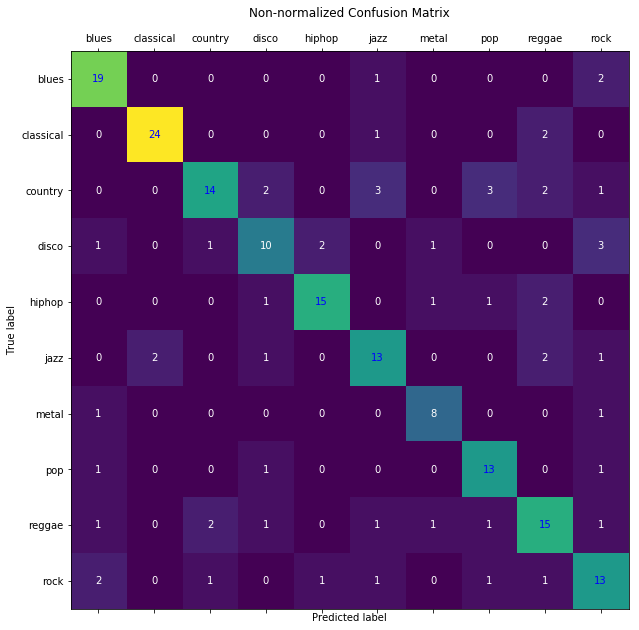

In [404]:
plt.figure(figsize=(10, 10))
plt.matshow(cm,fignum=1)
plt.xlabel('Predicted label')
# Show all ticks and label them with their respective entries.
plt.xticks(np.arange(cm.shape[1]), genres)
plt.yticks(np.arange(cm.shape[0]), genres)

# Label the squares.
fmt = '.0f' 
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="blue" if cm[i, j] > thresh else "white")
plt.tight_layout()

plt.ylabel('True label')
plt.title('Non-normalized Confusion Matrix')
print(cm)
plt.savefig('non_normalized_cm.png')
plt.show()

## Normalized Confusion Matrix

In [398]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

[[0.86363636 0.         0.         0.         0.         0.04545455
  0.         0.         0.         0.09090909]
 [0.         0.88888889 0.         0.         0.         0.03703704
  0.         0.         0.07407407 0.        ]
 [0.         0.         0.56       0.08       0.         0.12
  0.         0.12       0.08       0.04      ]
 [0.05555556 0.         0.05555556 0.55555556 0.11111111 0.
  0.05555556 0.         0.         0.16666667]
 [0.         0.         0.         0.05       0.75       0.
  0.05       0.05       0.1        0.        ]
 [0.         0.10526316 0.         0.05263158 0.         0.68421053
  0.         0.         0.10526316 0.05263158]
 [0.1        0.         0.         0.         0.         0.
  0.8        0.         0.         0.1       ]
 [0.0625     0.         0.         0.0625     0.         0.
  0.         0.8125     0.         0.0625    ]
 [0.04347826 0.         0.08695652 0.04347826 0.         0.04347826
  0.04347826 0.04347826 0.65217391 0.04347826]
 [0

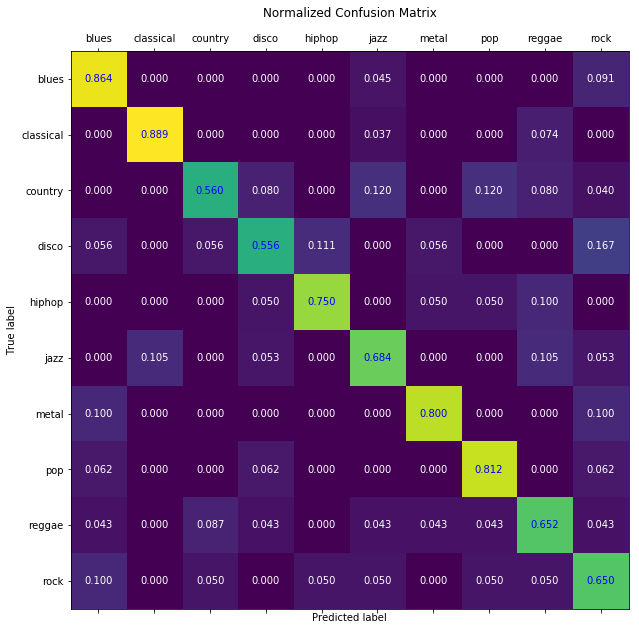

In [405]:
plt.figure(figsize=(10, 10))
plt.matshow(cm_normalized,fignum=1)
plt.xlabel('Predicted label')
# Show all ticks and label them with their respective entries.
plt.xticks(np.arange(cm_normalized.shape[1]), genres)
plt.yticks(np.arange(cm_normalized.shape[0]), genres)

# Label the squares.
fmt = '.3f' 
thresh = cm_normalized.max() / 2.
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        plt.text(j, i, format(cm_normalized[i, j], fmt),
                ha="center", va="center",
                color="blue" if cm_normalized[i, j] > thresh else "white")
plt.tight_layout()

plt.ylabel('True label')
plt.title('Normalized Confusion Matrix')
print(cm_normalized)
plt.savefig('normalized_cm.png')

Adding the probabilities in the diagonals (corresponding to correct classification), and dividing by the number of genres (10), we get that the Large Layer Neural Network Model with Dropout is correctly predicting labels on the test data 72.17% of the time (0.7217 for average per-class classification accuracy).